In [47]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#!pip install seaborn --upgrade

In [48]:
import pandas as pd
import numpy as np
#from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import joblib
from collections import Counter, defaultdict
from scipy.stats import skew

In [49]:
#importing data
df=pd.read_csv('clustering_data.csv')

In [50]:
df.head()

,id,Elevation,Aspect,Slope,Wilderness,Soil_Type,Hillshade_9am,Hillshade_noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,11000,elevation_medium,aspect_high,slope_low,comanche,bullwark_a,hillshade_9am_min,hillnoon_max,0,1,low
1,11001,elevation_medium,aspect_medium,slope_medium,comanche,ratake_a,hillshade_9am_max,hillnoon_min,2,1,low
2,11002,elevation_medium,aspect_high,slope_medium,comanche,ratake_a,hillshade_9am_min,hillnoon_max,1,1,low
3,11003,elevation_medium,aspect_low,slope_ultra,comanche,bullwark_a,hillshade_9am_min,hillnoon_min,1,1,low
4,11004,elevation_medium,aspect_high,slope_high,comanche,ratake_a,hillshade_9am_min,hillnoon_max,3,3,low


In [51]:
category_data = df.select_dtypes(include=['object']).copy()
#category_data

In [52]:
np.unique(df['id'].values).shape

(4120,)

In [53]:
label_encoder = preprocessing.LabelEncoder()
df['Elevation'] = label_encoder.fit_transform(df['Elevation'])
label_encoder = preprocessing.LabelEncoder()
df['Aspect'] = label_encoder.fit_transform(df['Aspect'])
label_encoder = preprocessing.LabelEncoder()
df['Slope'] = label_encoder.fit_transform(df['Slope'])
label_encoder = preprocessing.LabelEncoder()
df['Wilderness'] = label_encoder.fit_transform(df['Wilderness'])
label_encoder = preprocessing.LabelEncoder()
df['Soil_Type'] = label_encoder.fit_transform(df['Soil_Type'])
label_encoder = preprocessing.LabelEncoder()
df['Hillshade_9am'] = label_encoder.fit_transform(df['Hillshade_9am'])
label_encoder = preprocessing.LabelEncoder()
df['Hillshade_noon'] = label_encoder.fit_transform(df['Hillshade_noon'])
label_encoder = preprocessing.LabelEncoder()
df['Horizontal_Distance_To_Fire_Points'] = label_encoder.fit_transform(df['Horizontal_Distance_To_Fire_Points'])
label_encoder = preprocessing.LabelEncoder()

In [54]:
target = df['Horizontal_Distance_To_Hydrology']
target.unique()

array([0, 2, 1, 3, 4, 5, 6], dtype=int64)

In [55]:
df

,id,Elevation,Aspect,Slope,Wilderness,Soil_Type,Hillshade_9am,Hillshade_noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
0,11000,2,0,1,1,1,1,0,0,1,1
1,11001,2,2,2,1,26,0,1,2,1,1
2,11002,2,0,2,1,26,1,0,1,1,1
3,11003,2,1,3,1,1,1,1,1,1,1
4,11004,2,0,0,1,26,1,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
4115,15115,2,0,3,1,26,1,0,4,0,2
4116,15116,2,2,0,1,26,0,1,6,4,2
4117,15117,2,0,3,1,26,0,1,4,4,2
4118,15118,2,0,3,1,26,1,0,4,4,1


id
0.0


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

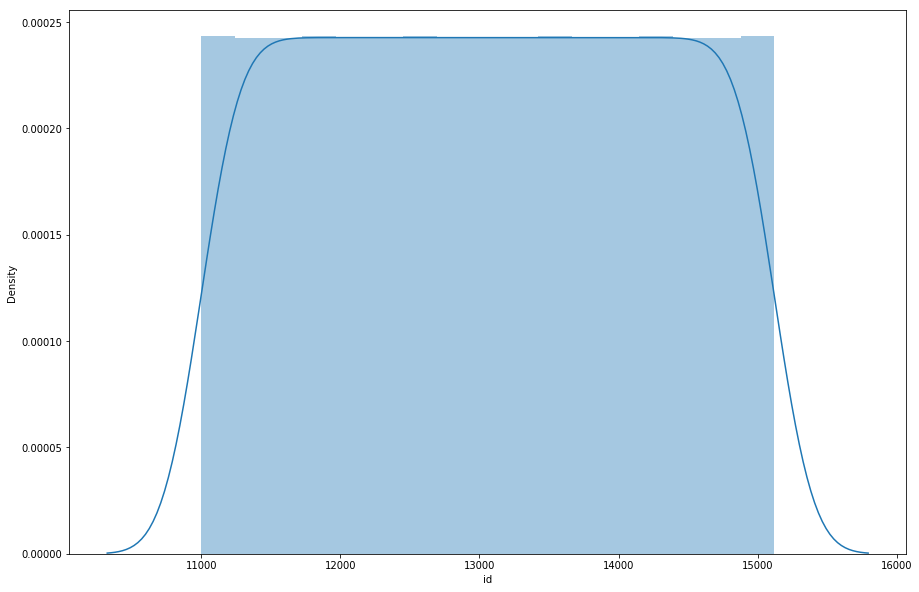

Elevation
-0.0876908672484293


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

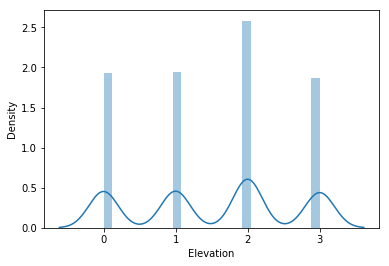

Aspect
0.0436126729140488


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

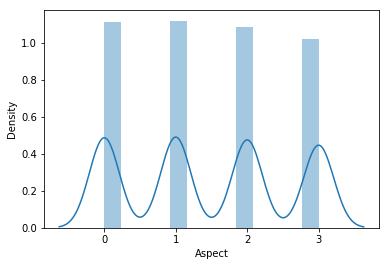

Slope
0.04098446908055957


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

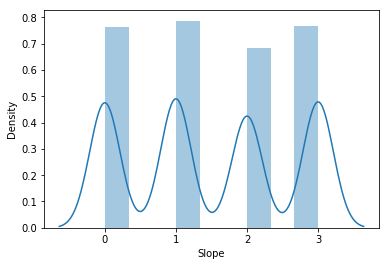

Wilderness
0.6763527829947288


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

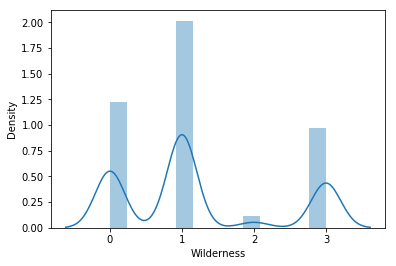

Soil_Type
0.34628251336375604


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

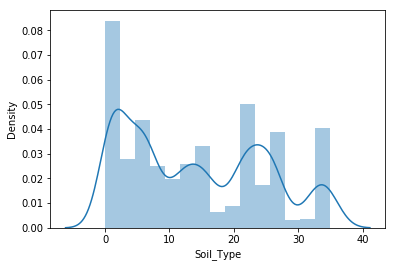

Hillshade_9am
-0.7156194708139373


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

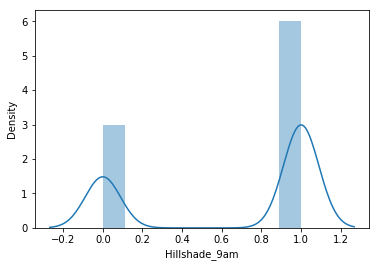

Hillshade_noon
-0.6844436559331836


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

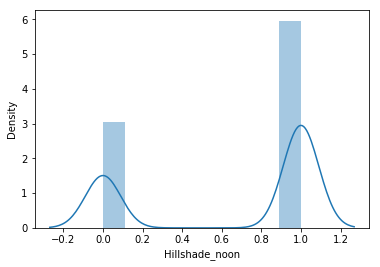

Horizontal_Distance_To_Hydrology
-0.2351637842642166


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

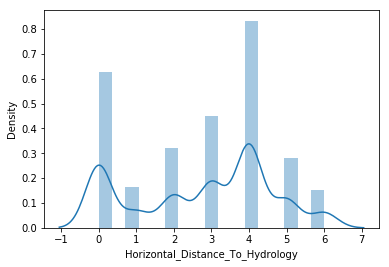

Vertical_Distance_To_Hydrology
0.13703864748740266


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

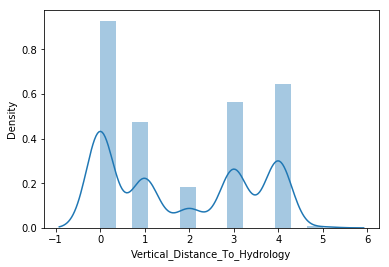

Horizontal_Distance_To_Fire_Points
-0.6541429417578049


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

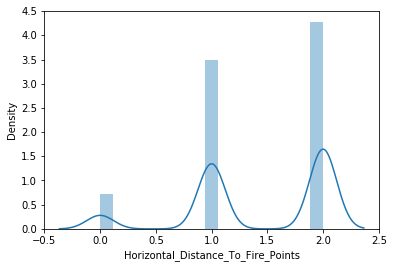

In [56]:
# Skewness before pre-processing
# after converting categorical into numerical
fig=plt.figure(figsize=(15,10))
for var in df:
    print(var)
    print(skew(df[var]))
    sns.distplot(df[var])
    plt.show()
    #fig.savefig('plot.png', dpi=300, bbox_inches='tight')

In [57]:
df.drop(['id'], axis = 1, inplace = True)

In [58]:
model = TSNE(n_components=2).fit_transform(df)
joblib.dump(model,'cluster.pkl')

['cluster.pkl']

In [59]:
model1 = joblib.load('cluster.pkl')

In [60]:
model1.shape

(4120, 2)

In [61]:
tsne_data=model1
tsne_data = pd.DataFrame(tsne_data)
tsne_data.insert(loc=1,column='labels',value = target)
x=tsne_data[0]
y=tsne_data[1]
z=tsne_data['labels']
df = pd.DataFrame({"Zero_value":x,"One_value":y,"Target":z})
#df = pd.DataFrame({"Zero_value":x,"One_value":y})
df.to_csv('model1.csv', index=False)

In [62]:
#data after pre-processing

df

,Zero_value,One_value,Target
0,-8.431623,-50.948135,0
1,31.862137,-38.294258,2
2,37.277813,-44.215096,1
3,-21.841158,-61.839752,1
4,21.637331,-34.353703,3
...,...,...,...
4115,37.750759,-35.139801,4
4116,18.994362,-30.150589,6
4117,22.626446,-42.081238,4
4118,22.317936,-46.022213,4


Zero_value
0.186565101146698


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

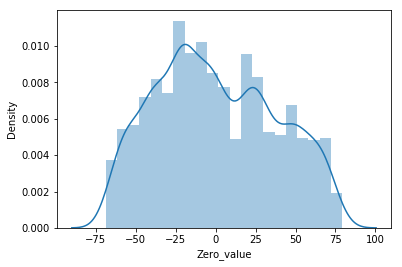

One_value
0.056163910776376724


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

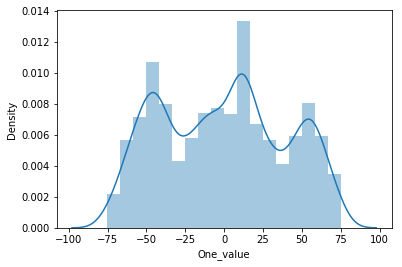

Target
-0.2351637842642166


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

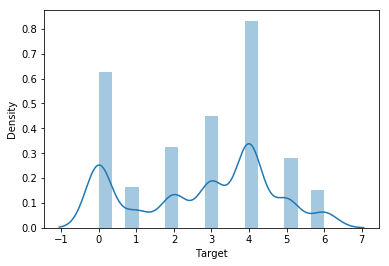

In [63]:
#skewness after pre-processing

for var in df:
    print(var)
    print(skew(df[var]))
    sns.distplot(df[var])
    plt.show()

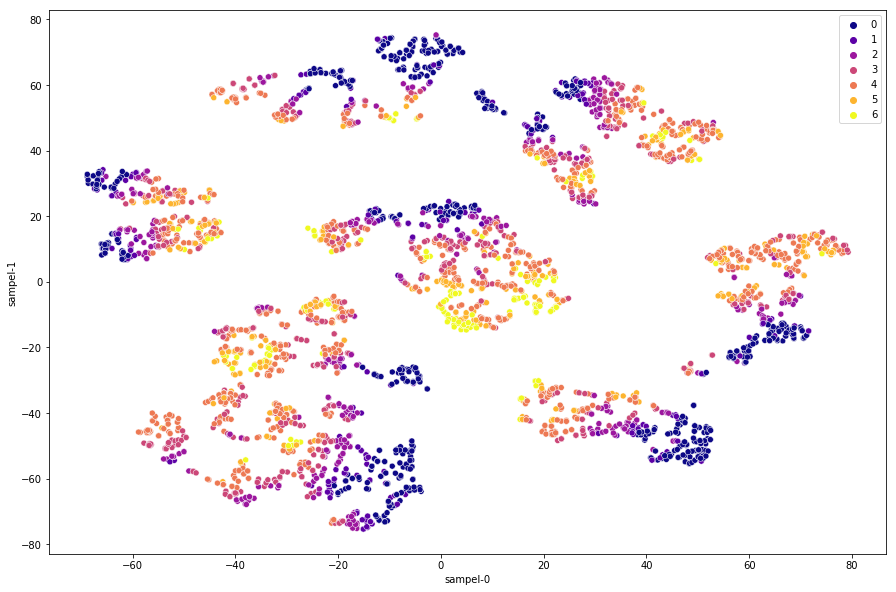

In [64]:
file1 = pd.read_csv("model1.csv")
fig=plt.figure(figsize=(15,10))
labels=(['0','1','2','3','4','5','6'])
sns.scatterplot(data=file1,x="Zero_value", y="One_value",hue='Target',palette="plasma",legend='full')
plt.xlabel("sampel-0")
plt.ylabel("sampel-1")
plt.legend()
plt.show()
fig.savefig('1.png')

KMEAN


In [65]:
km = KMeans(n_clusters=7,init='random',max_iter=500)
km

KMeans(init='random', max_iter=500, n_clusters=7)

In [66]:
y_pred = km.fit_predict(df[['Zero_value','One_value','Target']])
y_pred

array([5, 1, 1, ..., 1, 1, 2])

In [67]:
df['cluster'] = y_pred
df['cluster'].unique()

array([5, 1, 2, 0, 6, 4, 3])

In [68]:
#fig=plt.figure(figsize=(15,10))
#sns.scatterplot(data=df,x=df['Zero_value'], y=df['One_value'],hue=y_pred,legend='full',palette="plasma")
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label = 'centroid',color = 'black',s=100)
#fig.savefig('2.png')

In [69]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]
df5 = df[df.cluster==5]
df6 = df[df.cluster==6]

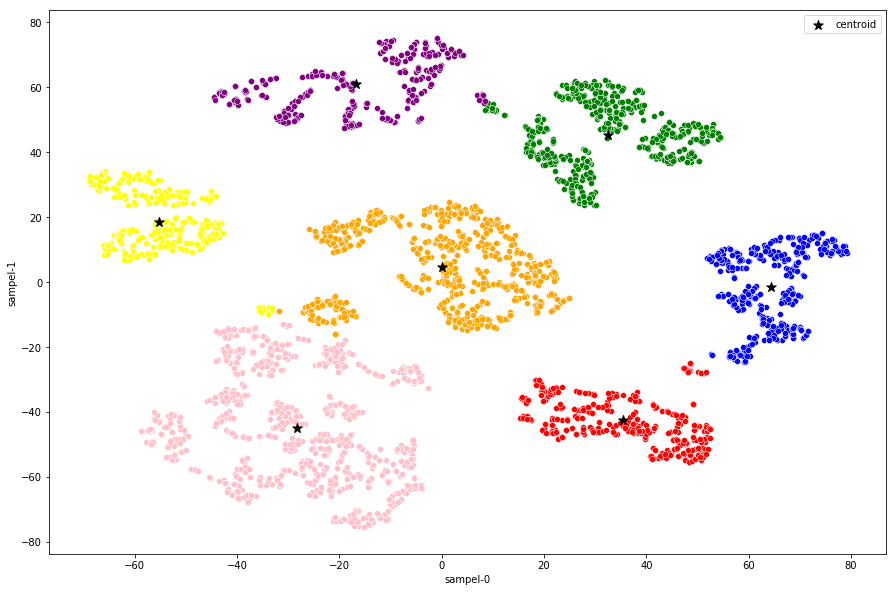

In [70]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(data=df0,x="Zero_value", y="One_value",color = "green")
sns.scatterplot(data=df1,x="Zero_value", y="One_value",color = "red")
sns.scatterplot(data=df2,x="Zero_value", y="One_value",color = "blue")
sns.scatterplot(data=df3,x="Zero_value", y="One_value",color = "orange")
sns.scatterplot(data=df4,x="Zero_value", y="One_value",color = "yellow")
sns.scatterplot(data=df5,x="Zero_value", y="One_value",color = "pink")
sns.scatterplot(data=df6,x="Zero_value", y="One_value",color = "purple")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label = 'centroid',color = 'black',s=100)
plt.xlabel("sampel-0")
plt.ylabel("sampel-1")
plt.legend()
plt.show()
fig.savefig('3.png')

In [71]:
# reporting the centroids

km.cluster_centers_

array([[ 32.4082767 ,  45.21352087,   3.00544465],
       [ 35.36969637, -42.3941194 ,   2.28571429],
       [ 64.29533332,  -1.54377405,   2.84757506],
       [  0.09368444,   4.57117248,   3.68333333],
       [-55.26741719,  18.60201179,   2.59      ],
       [-28.29283753, -44.93625653,   2.62417375],
       [-16.84867125,  60.88627209,   1.73218143]])

In [72]:
# counting the data points in the cluster Kmeans

print(Counter(km.labels_))

Counter({5: 1058, 3: 780, 0: 551, 6: 463, 1: 434, 2: 433, 4: 401})


KMEAN++


In [73]:
kmp = KMeans(n_clusters=7,init='k-means++',max_iter=500)
kmp

KMeans(max_iter=500, n_clusters=7)

In [74]:
y_pred = kmp.fit_predict(df[['Zero_value','One_value','Target']])
y_pred

array([1, 4, 4, ..., 4, 4, 2])

In [75]:
df['cluster'] = y_pred
df['cluster'].unique()

array([1, 4, 2, 6, 0, 3, 5])

In [76]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]
df5 = df[df.cluster==5]
df6 = df[df.cluster==6]

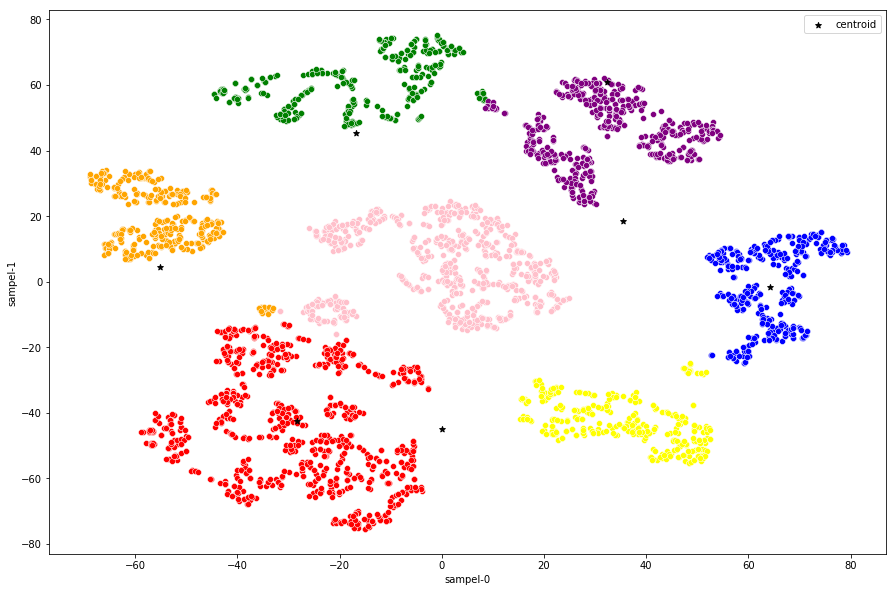

In [77]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(data=df0,x="Zero_value", y="One_value",color = "green")
sns.scatterplot(data=df1,x="Zero_value", y="One_value",color = "red")
sns.scatterplot(data=df2,x="Zero_value", y="One_value",color = "blue")
sns.scatterplot(data=df3,x="Zero_value", y="One_value",color = "orange")
sns.scatterplot(data=df4,x="Zero_value", y="One_value",color = "yellow")
sns.scatterplot(data=df5,x="Zero_value", y="One_value",color = "pink")
sns.scatterplot(data=df6,x="Zero_value", y="One_value",color = "purple")
plt.scatter(kmp.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label = 'centroid',color = 'black')
plt.xlabel("sampel-0")
plt.ylabel("sampel-1")
plt.legend()
plt.show()
fig.savefig('4.png')

In [78]:
# counting the data points in the cluster Kmeans++

print(Counter(kmp.labels_))

Counter({1: 1058, 5: 780, 6: 551, 0: 463, 4: 434, 2: 433, 3: 401})


In [79]:
# reporting the centroids

kmp.cluster_centers_

array([[-16.84867125,  60.88627209,   1.73218143],
       [-28.2874706 , -44.96946602,   2.62287335],
       [ 64.29533332,  -1.54377405,   2.84757506],
       [-55.14138357,  18.52580147,   2.60199005],
       [ 35.36969637, -42.3941194 ,   2.28571429],
       [  0.12705023,   4.55602882,   3.68035944],
       [ 32.4082767 ,  45.21352087,   3.00544465]])

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
df

,Zero_value,One_value,Target,cluster
0,-8.431623,-50.948135,0,1
1,31.862137,-38.294258,2,4
2,37.277813,-44.215096,1,4
3,-21.841158,-61.839752,1,1
4,21.637331,-34.353703,3,4
...,...,...,...,...
4115,37.750759,-35.139801,4,4
4116,18.994362,-30.150589,6,4
4117,22.626446,-42.081238,4,4
4118,22.317936,-46.022213,4,4


In [82]:
clustering = DBSCAN(eps=9, min_samples=1)

In [83]:
y_pred = clustering.fit_predict(df[['Zero_value','One_value','Target']])
y_pred

array([0, 1, 1, ..., 1, 1, 2], dtype=int64)

In [84]:
df['cluster'] = y_pred
df['cluster'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [85]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]
df5 = df[df.cluster==5]
df6 = df[df.cluster==6]

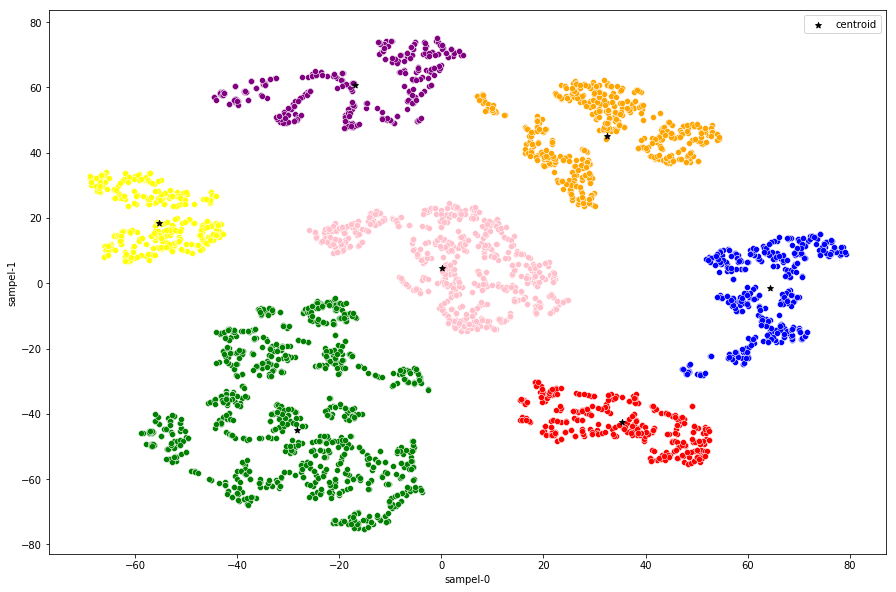

In [86]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(data=df0,x="Zero_value", y="One_value",color = "green")
sns.scatterplot(data=df1,x="Zero_value", y="One_value",color = "red")
sns.scatterplot(data=df2,x="Zero_value", y="One_value",color = "blue")
sns.scatterplot(data=df3,x="Zero_value", y="One_value",color = "orange")
sns.scatterplot(data=df4,x="Zero_value", y="One_value",color = "yellow")
sns.scatterplot(data=df5,x="Zero_value", y="One_value",color = "pink")
sns.scatterplot(data=df6,x="Zero_value", y="One_value",color = "purple")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label = 'centroid',color = 'black')
plt.xlabel("sampel-0")
plt.ylabel("sampel-1")
plt.legend()
plt.show()
fig.savefig('5.png')

In [87]:
# counting the data points in the cluster DBSCAN

print(Counter(clustering.labels_))

Counter({0: 1162, 5: 697, 3: 569, 2: 453, 6: 445, 1: 414, 4: 380})
